In [1]:
import os

data_dir = "D:\\TITO\\Documents\\BANGKIT\\project\\brain_tumour_classification\\Data"

glioma_tumor_training_dir = os.path.join(data_dir, "training", "glioma_tumor")
meningioma_tumor_training_dir = os.path.join(data_dir, "training", "meningioma_tumor")
normal_training_dir = os.path.join(data_dir,"training", "normal")
pituitary_tumor_training_dir = os.path.join(data_dir,"training", "pituitary_tumor")

print('jumlah data training glioma:', len(os.listdir(glioma_tumor_training_dir)))
print('jumlah data training meningioma:', len(os.listdir(meningioma_tumor_training_dir)))
print('jumlah data training gaada tumor:', len(os.listdir(normal_training_dir)))
print('jumlah data training pituitary:', len(os.listdir(pituitary_tumor_training_dir)))

jumlah data training glioma: 901
jumlah data training meningioma: 913
jumlah data training gaada tumor: 438
jumlah data training pituitary: 844


In [2]:
glioma_tumor_validation_dir = os.path.join(data_dir, "validation", "glioma_tumor")
meningioma_tumor_validation_dir = os.path.join(data_dir, "validation", "meningioma_tumor")
normal_validation_dir = os.path.join(data_dir,"validation", "normal")
pituitary_tumor_validation_dir = os.path.join(data_dir,"validation", "pituitary_tumor")

print('jumlah data validasi glioma:', len(os.listdir(glioma_tumor_validation_dir)))
print('jumlah data validasi meningioma:', len(os.listdir(meningioma_tumor_validation_dir)))
print('jumlah data validasi gaada tumor:', len(os.listdir(normal_validation_dir)))
print('jumlah data validasi pituitary:', len(os.listdir(pituitary_tumor_validation_dir)))

jumlah data validasi glioma: 702
jumlah data validasi meningioma: 913
jumlah data validasi gaada tumor: 438
jumlah data validasi pituitary: 844


In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [5]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(patience=5,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR ="D:\\TITO\\Documents\\BANGKIT\\project\\brain_tumour_classification\\Data\\training"
training_datagen = ImageDataGenerator(rescale = 1./255.0)

VALIDATION_DIR = "D:\\TITO\\Documents\\BANGKIT\\project\\brain_tumour_classification\\Data\\validation"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size = 16
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=16
)

Found 3096 images belonging to 4 classes.
Found 2897 images belonging to 4 classes.


In [8]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks=[lr,es])

Epoch 1/25
20/20 [==============================] - 26s 434ms/step - loss: 1.3811 - accuracy: 0.2812 - val_loss: 1.4130 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/25
20/20 [==============================] - 8s 411ms/step - loss: 1.3731 - accuracy: 0.2969 - val_loss: 1.3341 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 3/25
20/20 [==============================] - 7s 355ms/step - loss: 1.3499 - accuracy: 0.3654 - val_loss: 1.3751 - val_accuracy: 0.2708 - lr: 0.0010
Epoch 4/25
20/20 [==============================] - 6s 302ms/step - loss: 1.3343 - accuracy: 0.3109 - val_loss: 1.2793 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 5/25
20/20 [==============================] - 6s 289ms/step - loss: 1.2887 - accuracy: 0.3594 - val_loss: 1.3358 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 6/25
20/20 [==============================] - 5s 250ms/step - loss: 1.1957 - accuracy: 0.4812 - val_loss: 1.2050 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 7/25
20/20 [==============================] - 5s 239ms/step - l

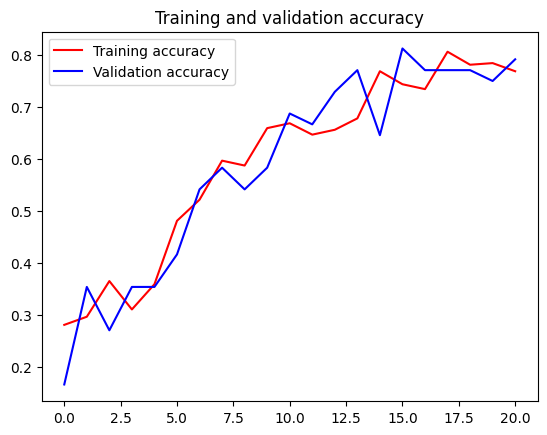

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()